<a href="https://colab.research.google.com/github/JiaminJIAN/Research/blob/master/Platoon%20control/platoon_control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Platoon control**

### **Introduction**

For $i = 0$, the state of the system governed by

\begin{cases}
    d P_{0}(t) = V_{0}(t) \, d t + \sigma_{1} \, d W_{1}(t) \\
    d V_{0}(t) = u_{0}(t) \, d t + \sigma_{2} \, d W_{2}(t)
\end{cases}

where $W_{1}(t)$ and $W_{2}(t)$ are standard Brownian motions and they are independent of each other.

Since we got the optimal control

$$u_{0}^{*}(x, t) = - \varphi (T - t) (x_{0,2} - \nu),$$

where 

$$\varphi(t) = \frac{e^{2t} - 1}{e^{2t} + 1}.$$

By the Euler method, we devide the time interval $[0, T]$ into $N$ segments and set $h = \frac{T}{N}$, then we have

\begin{cases}
    P_{0}((i+1)h) = P_{0}(ih) + V_{0}(ih) h + \sigma_{1} \sqrt{h} Z_{i} \\
    V_{0}((i+1)h) = V_{0}(ih) - \varphi(T - ih) (V_{0}(ih) - \nu) h + \sigma_{2} \sqrt{h} X_{i}
\end{cases}

where $i = 0, 1, \dots, N-1$ and ${X}_{i}, Z_{i}$ are independent standard normal variables.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import plt

In [2]:
## Parameters

P0_0 = 1
V0_0 = 20
nu = 70
sigma_1 = 1
sigma_2 = 1
T = 1
N = 10

In [3]:
def varphi(t):
  value = (np.exp(2*t) - 1) / (np.exp(2*t) + 1)
  return value

In [4]:
def path_n0(P0_0, V0_0, nu, sigma_1, sigma_2, T, N):
    t = np.linspace(0, T, num = N+1)
    h = T/N  
    P0 = P0_0 + np.zeros(N+1)  
    V0 = V0_0 + np.zeros(N+1)            
    for i in range(N):
        V0[i+1] = V0[i] - varphi(T-i*h) * (V0[i] - nu) * h + sigma_2 * np.sqrt(h) * np.random.normal()
        P0[i+1] = P0[i] + V0[i] * h + sigma_1 * np.sqrt(h) * np.random.normal()
    return t, V0, P0

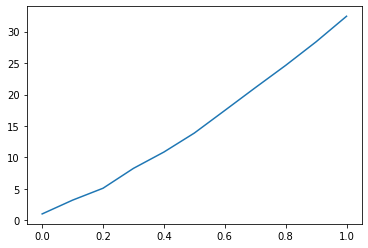

In [5]:
[t, V0, P0] = path_n0(P0_0, V0_0, nu, sigma_1, sigma_2, T, N)
plt.plot(t,P0)

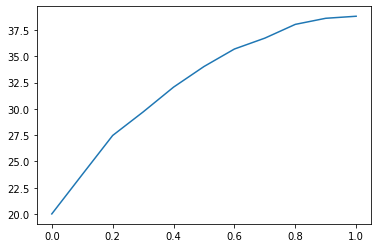

In [6]:
plt.plot(t,V0)

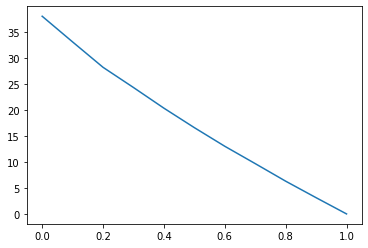

In [7]:
u = - varphi(T-t) * (V0 - nu)
plt.plot(t,u)

When $N=1$, there are two vehicles in the platoon system. We suppose the optimal strategy of the second vehicle is 

$$u_{1}^{*} (x, t) = - \varphi (T - t) (x_{1,2} - x_{0,2})$$

Similarly, by the Euler method, we devide the time interval $[0, T]$ into $N$ segments and set $h = \frac{T}{N}$, then we have

\begin{cases}
    P_{1}((i+1)h) = P_{1}(ih) + V_{1}(ih) h + \sigma_{1} \sqrt{h} Z_{i} \\
    V_{1}((i+1)h) = V_{1}(ih) - \varphi(T - ih) (V_{1}(ih) - V_{0}(ih)) h + \sigma_{2} \sqrt{h} X_{i}
\end{cases}

where $i = 0, 1, \dots, N-1$ and ${X}_{i}, Z_{i}$ are independent standard normal variables.

In [8]:
def path_n1(P1_0, V1_0, P0_0, V0_0, nu, sigma_1, sigma_2, T, N):
    t = np.linspace(0, T, num = N+1)
    h = T/N  
    P1 = P1_0 + np.zeros(N+1)  
    V1 = V1_0 + np.zeros(N+1)
    [t, V0, P0] = path_n0(P0_0, V0_0, nu, sigma_1, sigma_2, T, N)            
    for i in range(N):
        V1[i+1] = V1[i] - varphi(T-i*h) * (V1[i] - V0[i]) * h + sigma_2 * np.sqrt(h) * np.random.normal()
        P1[i+1] = P1[i] + V1[i] * h + sigma_1 * np.sqrt(h) * np.random.normal()
    return t, V1, P1

In [9]:
## Parameters

P1_0 = 0
V1_0 = 20

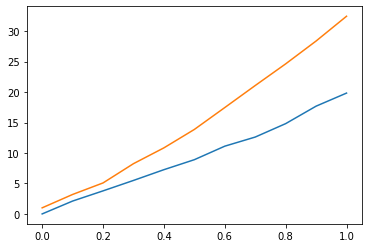

In [10]:
[t, V1, P1] = path_n1(P1_0, V1_0, P0_0, V0_0, nu, sigma_1, sigma_2, T, N)
plt.plot(t,P1)
plt.plot(t,P0)

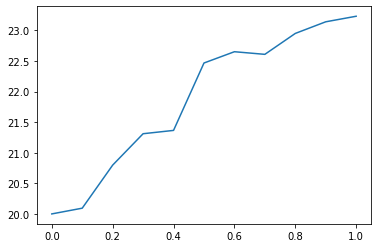

In [11]:
plt.plot(t,V1)

In [12]:
def velocity_matrix(v, nu, sigma_1, sigma_2, T, N, M):
    t = np.linspace(0, T, num = N+1)
    h = T/N
    V = np.zeros([M+1, N+1])
    V[:,0] = v
    for i in range(N):
        V[0,i+1] = V[0,i] - varphi(T-i*h) * (V[0,i] - nu) * h + sigma_2 * np.sqrt(h) * np.random.normal()
        for j in range(1, M+1):
            V[j,i+1] = V[j,i] - varphi(T-i*h) * (V[j,i] - V[j-1,i]) * h + sigma_2 * np.sqrt(h) * np.random.normal()
    return V

In [13]:
## Parameters

M = 10
v = np.zeros(M+1, order = 'F') + 20

V = velocity_matrix(v, nu, sigma_1, sigma_2, T, N, M)

print(V)

[[20.         23.83064677 27.1324757  29.83231735 31.93820514 33.8886036
  35.40878929 36.80566024 38.04609277 38.42529821 38.71335893]
 [20.         19.83979814 20.12738926 20.90771185 21.44363331 21.94929775
  22.24822802 23.29172298 23.77817323 23.93970876 24.38330674]
 [20.         20.12567571 19.72672565 19.48154617 19.645273   19.97026843
  19.53539058 19.77286104 19.64728803 19.41094783 19.71623353]
 [20.         20.06634008 19.7461794  19.29318598 19.39005758 19.00483766
  18.69775823 18.62541387 18.72655398 18.52620329 18.23237554]
 [20.         19.8853496  19.74956716 19.47777874 19.34719441 19.47491851
  19.48785222 19.48585431 19.61350752 19.45318047 19.30292382]
 [20.         19.83234708 19.43243665 19.39010974 19.45387469 19.43693222
  19.19912873 19.06287312 19.47813879 19.10499527 18.72855031]
 [20.         19.72630296 19.81532448 19.70932338 19.42465313 19.65941774
  19.840225   19.52288881 19.16965475 18.80523308 18.77136125]
 [20.         19.84894056 19.97166938 19.7